<a href="https://www.kaggle.com/code/nooralrajab/rtp-ratio-assessment-using-cite-seq-ipynb?scriptVersionId=192807011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

This notebook has "checkpoints" where the adata object is saved as a file in case a RAM overload occurs, in which all variables will be lost.

# Installations

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
input_directory="/kaggle/input"
output_directory="/kaggle/working"

In [3]:
!pip install scanpy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=9d7589c96832996fde19256be65bb1abbb0737f81bdc654fa9d8d90d21f6a1b2
  Stored in directory: /root/.cache/pip/wheels/e6/3e/d2/2325892469be5cc93dbc1dbe101d0fc48b4765adfb1973b583
Successfully built session-info


In [4]:
!pip install muon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 kB 4.4 MB/s eta 0:00:00a 0:00:01


In [5]:
!pip install RDKit
!pip install pybel
!pip install PyBioMed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 kB 5.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 2.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 60.4 MB/s eta 0:00:00:00:01
  Created wheel for ratelimit: filename=ratelimit-2.2.1-py3-none-any.whl size=5909 sha256=baa008cc9e0c6ea952262a3841fba4ab64cd373c02351f7ac98de52b8413a6d3
  Stored in directory: /root/.cache/pip/wheels/cd/89/18/29c86a2003f95cd4b9ac9cd75d9733d51bf5252c263f27f3f1
Successfully built ratelimit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 2.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for

In [6]:
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.3 MB/s eta 0:00:0000:01:00:01


In [7]:
!pip install celltypist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 6.2 MB/s eta 0:00:0000:0100:01m


In [8]:
!pip install --user magic-impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 1.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.4 MB/s eta 0:00:0000:010:01


# Choosing datasets and combining them into an adata object

In [9]:
import pandas as pd
import scanpy as sc
import os
from scipy import io
import numpy as np
import anndata as ad
import muon as mu

'''def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text'''

# Load the data
adata1 = mu.read_10x_h5(input_directory+"/gsm4929081/GSM4929081_B1_10xlane1_RNA_filtered_feature_bc_matrix.h5")
adata2 = mu.read_10x_h5(input_directory+"/gsm4929081/GSM4929082_B1_10xlane2_RNA_filtered_feature_bc_matrix.h5")
adata3 = mu.read_10x_h5(input_directory+"/gsm4929081/GSM4929083_B1_10xlane3_RNA_filtered_feature_bc_matrix.h5")

adata1.obs['batch']="batch1"
adata2.obs['batch']="batch2"
adata3.obs['batch']="batch3"

adata_rna_list=[]
adata_prot_list=[]

for a in [adata1, adata2, adata3]:
    adata_rna_list.append(a.mod['rna'])
    adata_prot_list.append(a.mod['prot'])
    a.mod['rna'].var_names_make_unique()
    a.mod['prot'].var_names_make_unique()
    
adata_rna = ad.concat(adata_rna_list, index_unique="-", keys=["b1", "b2", "b3"])
adata_prot = ad.concat(adata_prot_list, index_unique="-", keys=["b1", "b2", "b3"])

adata_rna.var_names_make_unique()
adata_rna.obs_names_make_unique()

adata_prot.var_names_make_unique()
adata_prot.obs_names_make_unique()

adata=mu.MuData({"rna": adata_rna, "prot": adata_prot})

# Display the modified var names for verification
print("RNA modality var names:")
print(adata_rna.var.index[:10])  # Display the first 10 for brevity
print("\nProtein modality var names:")
print(adata_prot.var.index[:10])  # Display the first 10 for brevity

isLogged=False # flag to prevent applying log scale twice
adata_rna

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/conda/lib/python3.7/site-packages/mudata/_core/mudata.py:447: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  f"{attr}_names are not unique. To make them unique, call `.{attr}_names_make_unique`."
/opt/conda/lib/python3.7/site-packages/mudata/_core/mudata.py:459: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  f"Cannot join columns with the same name because {attr}_names are intersecting."


RNA modality var names:
Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10'],
      dtype='object')

Protein modality var names:
Index(['HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9',
       'HTO10'],
      dtype='object')


AnnData object with n_obs × n_vars = 90000 × 32738

## Checking genes in common between prots and rna

In [10]:
def intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

print(intersection(adata.mod['rna'].var.index, adata.mod['prot'].var.index))

['TIGIT', 'CD7', 'CD52', 'CD27', 'CD19', 'CD96', 'CD163', 'CD38', 'CD82', 'HLA-F', 'NLRP2', 'CD70', 'CD58', 'XCR1', 'CLEC12A', 'CD99', 'CD274', 'CD33', 'CD14', 'CD44', 'KLRG1', 'CD36', 'CD209', 'CD47', 'CD28', 'CD101', 'CD83', 'CD81', 'CD5', 'CD34', 'CD244', 'CD4', 'CD69', 'CD2', 'CD40', 'CD86', 'CX3CR1', 'CD80', 'CD207', 'CD226', 'CD22']


# Preprocessing

## Unprocessed violin plots

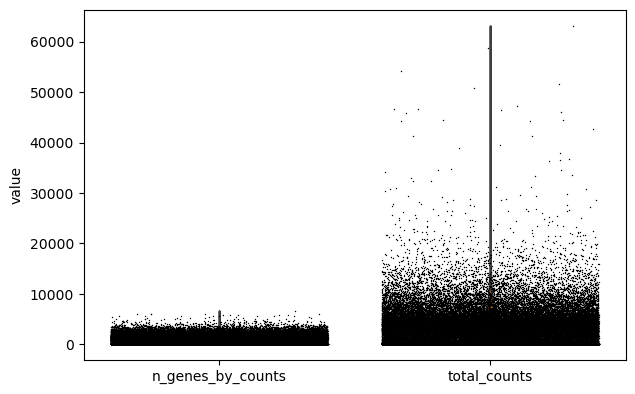

In [11]:
# mitochondrial genes
adata_rna.var["mt"] = adata_rna.var_names.str.startswith("MT-")
# ribosomal genes
adata_rna.var["ribo"] = adata_rna.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata_rna.var["hb"] = adata_rna.var_names.str.contains(("^HB[^(P)]"))

sc.pp.calculate_qc_metrics(adata_rna, inplace=True)
sc.pp.calculate_qc_metrics(adata_rna, qc_vars=["mt","ribo", "hb"], inplace=True, percent_top=[20])
#adata.var_names_make_unique()
sc.pl.violin(adata_rna, ['n_genes_by_counts', 'total_counts'], jitter=0.4)

## Filtering, normalization, scaling, and layering

In [12]:
import scanpy.external as sce

'''# for exporting signature matrix
sc.pp.filter_cells(data=adata_rna, min_counts=3, inplace=True)
#sc.pp.filter_cells(data=adata, max_counts=25000, inplace=True)
sc.pp.filter_cells(data=adata_rna, min_genes=200, inplace=True)
sc.pp.filter_cells(data=adata_rna, max_genes=2500, inplace=True)'''

# Define filtering criteria
rna_filter_criteria = (adata['rna'].obs['n_genes_by_counts'] > 200) & (adata['rna'].obs['n_genes_by_counts'] < 2500) & (adata['rna'].obs['total_counts'] > 3)
filtered_indices = adata['rna'].obs[rna_filter_criteria].index
adata_filtered = adata[filtered_indices, :]
adata_rna=adata_filtered.mod['rna']
adata_prot=adata_filtered.mod['prot']

print("Number of observations in adata_rna_filtered:", adata_filtered.mod['rna'].n_obs)
print("Number of observations in adata_prot_filtered:", adata_filtered.mod['prot'].n_obs)

if(isLogged==True):
    print("Data is already logged. Did not perform scaling and transformation again.")
        
else:
    # Pre-normalization layers - not used
    #adata_rna.layers["pre_norm"]=adata_rna.X.copy()
    #adata_prot.layers["pre_norm"]=adata_prot.X.copy()
    
    sc.pp.normalize_total(adata_rna, target_sum=1e4) # no point in normalizing prot (right?)
    
    # Pre-log transform layers - not used
    #adata_rna.layers["pre_log"]=adata_rna.X.copy()
    #adata_prot.layers["pre_log"]=adata_prot.X.copy()

    sc.pp.log1p(adata_rna)
    sc.pp.log1p(adata_prot)
    isLogged=True
    sce.pp.magic(adata_rna, name_list='all_genes', knn=5, copy=False) # imputation
    # Ensure both modalities have the same cell barcodes
    common_barcodes = adata_rna.obs.index.intersection(adata_prot.obs.index)
    adata_rna = adata_rna[common_barcodes, :]
    adata_prot = adata_prot[common_barcodes, :]
    
    sc.pp.calculate_qc_metrics(adata_rna, inplace=True)
    

Number of observations in adata_rna_filtered: 39625
Number of observations in adata_prot_filtered: 39625


/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/root/.local/lib/python3.7/site-packages/magic/magic.py:426: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  "Input matrix contains unexpressed genes. "


  Running MAGIC with `solver='exact'` on 32738-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.


/root/.local/lib/python3.7/site-packages/magic/utils.py:145: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  data = anndata.AnnData(data)
/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


## Post processing violin plots

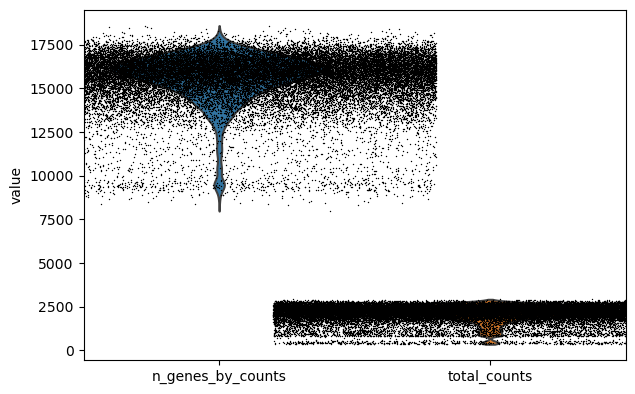

In [13]:
sc.pl.violin(adata_rna, ['n_genes_by_counts', 'total_counts'], jitter=0.8)

Low variance genes will be filtered later on in other notebooks.

In [14]:
'''sc.pp.highly_variable_genes(adata_rna)
adata_rna.var[adata_rna.var.highly_variable]
adata_rna.var'''

'sc.pp.highly_variable_genes(adata_rna)\nadata_rna.var[adata_rna.var.highly_variable]\nadata_rna.var'

## Save adata objects

In [15]:
adata_rna.write('adata_rna_filtered.h5ad')
adata_prot.write('adata_prot_filtered.h5ad')

# Checkpoint

In [1]:
!pip install scanpy 
!pip install muon
!pip install RDKit
!pip install pybel
!pip install PyBioMed
!pip install leidenalg
!pip install celltypist

In [2]:
input_directory="/kaggle/input"
output_directory="/kaggle/working"

In [3]:
import pandas as pd
import scanpy as sc
import os
from scipy import io
import numpy as np
import anndata as ad
import muon as mu
import matplotlib as plt

In [4]:
adata_rna = ad.read(output_directory+'/adata_rna_filtered.h5ad')
adata_prot = ad.read(output_directory+'/adata_prot_filtered.h5ad')

Find genes in common between RNA-seq and antibody capture. More genes will be found further down in this notebook using gene synonyms.

In [5]:
def intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))
    
adata=mu.MuData({"rna": adata_rna, "prot": adata_prot})

prots=list(intersection(adata_rna.var.index, adata_prot.var.index))
print(prots)
print(len(prots))

['CD70', 'CD27', 'CD81', 'CD82', 'CD7', 'CD40', 'CD47', 'NLRP2', 'CD58', 'CX3CR1', 'CD226', 'CD209', 'CD2', 'CD14', 'KLRG1', 'CD274', 'CD52', 'CD96', 'CD163', 'CD36', 'CD244', 'CD33', 'CLEC12A', 'CD28', 'CD44', 'CD34', 'CD19', 'XCR1', 'CD22', 'CD4', 'HLA-F', 'CD101', 'CD80', 'CD86', 'CD5', 'CD38', 'CD83', 'CD99', 'CD69', 'TIGIT', 'CD207']
41


/opt/conda/lib/python3.7/site-packages/mudata/_core/mudata.py:459: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  f"Cannot join columns with the same name because {attr}_names are intersecting."


# Determining cell types

In [6]:
import celltypist

# Load model
model = celltypist.models.Model.load('Healthy_COVID19_PBMC.pkl')

# Perform annotation
predictions = celltypist.annotate(adata_rna, model=model, majority_voting=True)

# Assign cell types
adata_rna.obs["cell_type"] = predictions.predicted_labels["majority_voting"]
adata_prot.obs["cell_type"] = predictions.predicted_labels["majority_voting"]

# Renaming protein columns to corresponding genes

In [7]:
HPA_genes=pd.read_csv(input_directory+"/hpa-gene-synonyms-and-protein-classes/HPA_Protein_Classes.tsv", sep='\t')

antigens=list(adata_prot.var.index) 
cd_lookup=pd.DataFrame({"Gene": antigens, "Found": False}, index=antigens)

for i, antigen in enumerate(antigens):
    if antigen in HPA_genes['Gene'].values:
        cd_lookup.loc[antigen, "Found"]=True
    else:
        for j, g_syn in enumerate(HPA_genes["Gene synonym"].values):
            if type(g_syn) != float and antigen in g_syn.split(", "):
                cd_lookup.loc[antigen, "Gene"]=HPA_genes.iloc[j]["Gene"]
                cd_lookup.loc[antigen, "Found"]=True
print(cd_lookup["Found"].describe())
display(cd_lookup.head(20))     
print(len(intersection(cd_lookup.loc[cd_lookup["Found"]==True, "Gene"].values,adata_rna.var.index)))

count      202
unique       2
top       True
freq       147
Name: Found, dtype: object


Gene  Found
HTO1        HTO1  False
HTO2        HTO2  False
HTO3        HTO3  False
HTO4        HTO4  False
HTO5        HTO5  False
HTO6        HTO6  False
HTO7        HTO7  False
HTO8        HTO8  False
HTO9        HTO9  False
HTO10      HTO10  False
CD80        CD80   True
CD86        CD86   True
CD274      CD274   True
CD273   PDCD1LG2   True
CD275     ICOSLG   True
CD11b      CD11b  False
CD137L    TNFSF9   True
CD70        CD70   True
CD40        CD40   True
CD3          CD3  False

144


In [8]:
adata_prot.var.index=cd_lookup["Gene"].values
adata_prot.var.index

Index(['HTO1', 'HTO2', 'HTO3', 'HTO4', 'HTO5', 'HTO6', 'HTO7', 'HTO8', 'HTO9',
       'HTO10',
       ...
       'CD101', 'IL21R', 'C5AR1', 'HLA-F', 'NLRP2', 'Podocalyxin', 'GGT1',
       'c-Met', 'TNFSF14', 'TNFRSF25'],
      dtype='object', length=202)

## Re-determine common genes between antigen capture and RNA sequencing

In [9]:
#prots=list(adata_prot.var.index)
prots=list(intersection(adata_rna.var.index, adata_prot.var.index))
print(prots)
print(len(prots))

['VCAM1', 'NCR1', 'IL4R', 'FCGR2B', 'TNFSF4', 'CX3CR1', 'CD226', 'CD2', 'IL21R', 'TNFRSF13C', 'NCAM1', 'CD14', 'CDH5', 'KLRG1', 'ICOSLG', 'KLRD1', 'ITGAE', 'CD36', 'THBD', 'CLEC12A', 'CD44', 'CD34', 'TNFRSF18', 'CRLF2', 'PDCD1', 'FUT4', 'CXCR3', 'SELP', 'KIT', 'CD69', 'CD207', 'CD27', 'SLAMF7', 'CD81', 'CD7', 'MSR1', 'IL2RB', 'TFRC', 'CLEC9A', 'CD40LG', 'PROM1', 'OLR1', 'CD8A', 'CD244', 'FCGR3B', 'CD22', 'NRP1', 'NCR2', 'CXCR4', 'SIGLEC7', 'EPCAM', 'CD38', 'ENTPD1', 'SLC7A5', 'CCR3', 'CCR6', 'VTCN1', 'FCRL4', 'FCGR1A', 'CD82', 'MME', 'TNFSF13B', 'CR1', 'CD47', 'ITGB2', 'CXCR5', 'LAIR1', 'NLRP2', 'CLEC4C', 'TNFRSF9', 'ITGA2B', 'CD209', 'PDCD1LG2', 'SLAMF1', 'LAMP1', 'CD274', 'CDH1', 'NT5E', 'CD52', 'ISG20', 'LAG3', 'MCAM', 'CD96', 'CTLA4', 'FASLG', 'FCRL5', 'CD33', 'PTGDR2', 'SELL', 'XCR1', 'CD19', 'TNFRSF13B', 'ICOS', 'TNFSF11', 'PTPRC', 'CD101', 'C5AR1', 'CD99', 'TIGIT', 'ITGB1', 'TNFSF14', 'FCER2', 'CD70', 'TNFRSF17', 'THY1', 'GGT1', 'MRC1', 'CD40', 'BTLA', 'MS4A1', 'SIGLEC1', 'HAVCR

## Save adata objects

In [10]:
adata_rna.write('adata_rna_relabeled.h5ad')
adata_prot.write('adata_prot_relabeled.h5ad')


# Checkpoint

In [ ]:
!pip install scanpy 
!pip install muon

In [11]:
import pandas as pd
import scanpy as sc
import os
from scipy import io
import numpy as np
import anndata as ad
import muon as mu
import matplotlib as plt

In [12]:
input_directory="/kaggle/input"
output_directory="/kaggle/working"

In [ ]:
adata_rna = ad.read(output_directory+'/adata_rna_relabeled.h5ad')
adata_prot = ad.read(output_directory+'/adata_prot_relabeled.h5ad')

In [13]:
def intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))
    
adata=mu.MuData({"rna": adata_rna, "prot": adata_prot})

prots=list(intersection(adata_rna.var.index, adata_prot.var.index))
prots=list(set(prots))
print(prots)
print(len(prots))

['VCAM1', 'NCR1', 'IL4R', 'FCGR2B', 'CD226', 'TNFSF4', 'CX3CR1', 'CD2', 'IL21R', 'TNFRSF13C', 'NCAM1', 'CD14', 'CDH5', 'KLRG1', 'ICOSLG', 'KLRD1', 'ITGAE', 'CD36', 'THBD', 'CLEC12A', 'CD44', 'CD34', 'TNFRSF18', 'CRLF2', 'PDCD1', 'FUT4', 'CXCR3', 'SELP', 'KIT', 'CD69', 'CD207', 'CD27', 'SLAMF7', 'CD81', 'CD7', 'MSR1', 'IL2RB', 'TFRC', 'CLEC9A', 'CD40LG', 'PROM1', 'OLR1', 'CD8A', 'CD244', 'FCGR3B', 'CD22', 'NRP1', 'NCR2', 'CXCR4', 'SIGLEC7', 'EPCAM', 'CD38', 'ENTPD1', 'SLC7A5', 'CCR3', 'CCR6', 'FCRL4', 'VTCN1', 'FCGR1A', 'CD82', 'MME', 'TNFSF13B', 'CR1', 'CD47', 'ITGB2', 'CXCR5', 'LAIR1', 'NLRP2', 'CLEC4C', 'TNFRSF9', 'ITGA2B', 'CD209', 'PDCD1LG2', 'SLAMF1', 'LAMP1', 'CD274', 'CDH1', 'NT5E', 'CD52', 'ISG20', 'LAG3', 'MCAM', 'CD96', 'CTLA4', 'FASLG', 'FCRL5', 'CD33', 'PTGDR2', 'SELL', 'XCR1', 'CD19', 'TNFRSF13B', 'ICOS', 'TNFSF11', 'PTPRC', 'CD101', 'C5AR1', 'CD99', 'TIGIT', 'ITGB1', 'TNFSF14', 'FCER2', 'CD70', 'TNFRSF17', 'THY1', 'GGT1', 'MRC1', 'CD40', 'BTLA', 'MS4A1', 'SIGLEC1', 'HAVCR

### This function gives row and column indicies for subplots

In [14]:
def orgMyPlots(subPlotsCount, columns=3):
    rows=np.ceil(float(subPlotsCount)/columns)
    x_ind=[]
    y_ind=[]
    
    for i in range(subPlotsCount):
        x_ind.append(i%columns)
        y_ind.append(int(np.floor(i/columns)))
    return x_ind, y_ind

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def create_transcript_protein_df(adata, prot_name):
    # Construct keys for RNA and protein
    '''rna_key = rna_prefix + prot_name
    prot_key = prot_prefix + prot_name'''
    
    rna_key=prot_name
    prot_key=prot_name
    
    # Check if the keys exist in the RNA and protein data
    if rna_key not in adata_rna.var.index or prot_key not in adata_prot.var.index:
        raise Exception(f"Target '{prot_name}' not found in vars for either antibody capture or gene expressions.")
   
    rna_df=adata_rna.to_df()
    prot_df=adata_prot.to_df()
    #rna_df=pd.DataFrame(adata_rna.layers["pre_norm"].toarray(), index=adata_rna.obs_names, columns=adata_rna.var_names)
    #prot_df=pd.DataFrame(adata_prot.layers["pre_norm"].toarray(), index=adata_prot.obs_names, columns=adata_prot.var_names)

    # Initialize lists to hold transcript and protein amounts
    transcripts = []
    protAmounts = []
    
    # Iterate over the observations in the RNA data
    for cell in rna_df.index:
        
        # Append transcript value from RNA data
        try:
            transcripts.append(rna_df.loc[cell, rna_key].values[0])
        except:
            transcripts.append(rna_df.loc[cell, rna_key])
        
        # Append protein value from protein data if cell exists in prot_df
        prot_cell=cell
        if prot_cell in prot_df.index:
            try:
                protAmounts.append(prot_df.loc[prot_cell, prot_key].values[0])
            except:
                protAmounts.append(prot_df.loc[prot_cell, prot_key])
        else:
            protAmounts.append(np.nan)  # or np.nan if you prefer
    
    # Create a DataFrame with transcripts and protein amounts
    df = pd.DataFrame({"Transcripts": transcripts, "Proteins": protAmounts})
    df.index = rna_df.index
    
    return df

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.001776      1.457429
std        0.006562      0.583625
min        0.000000      0.000000
25%        0.000000      1.098612
50%        0.000000      1.386294
75%        0.000478      1.791759
max        0.158315      6.361302

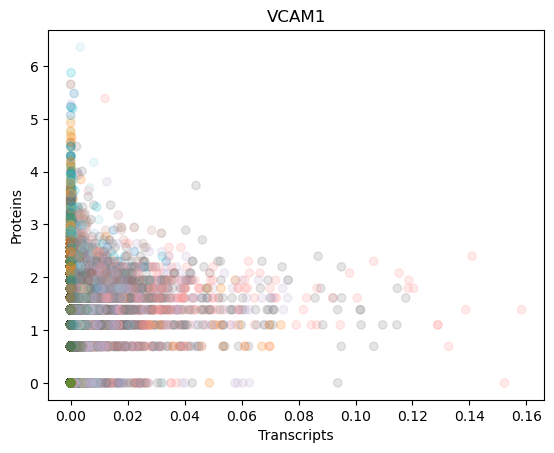

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.097642      1.117886
std        0.180717      0.715042
min        0.000000      0.000000
25%        0.001089      0.693147
50%        0.004664      1.098612
75%        0.082191      1.609438
max        0.867979      5.739793

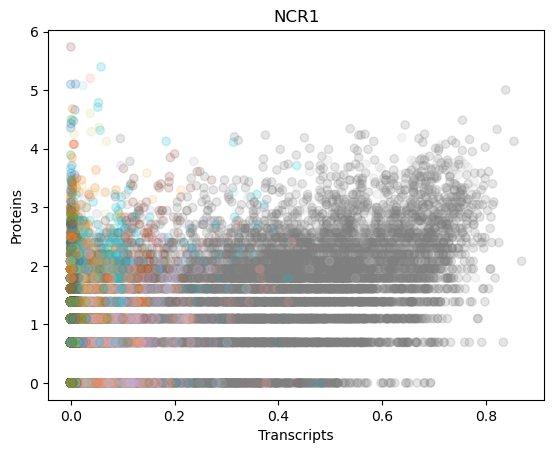

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.252706      2.292624
std        0.232305      0.570814
min        0.000000      0.000000
25%        0.113517      1.945910
50%        0.179014      2.302585
75%        0.296705      2.564949
max        1.638976      9.148146

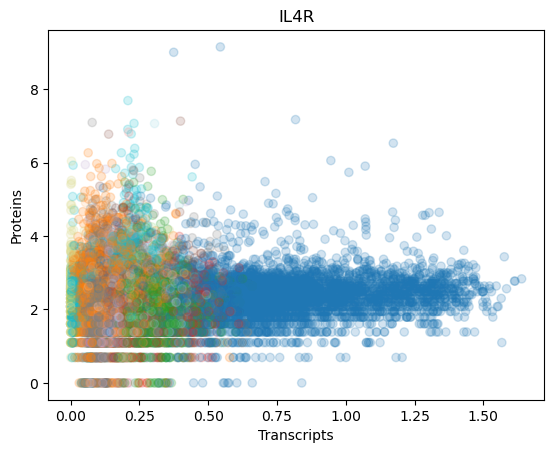

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.091534      2.234151
std        0.120261      1.356457
min        0.000000      0.000000
25%        0.010272      1.098612
50%        0.045283      1.945910
75%        0.114504      3.465736
max        0.929921      7.839132

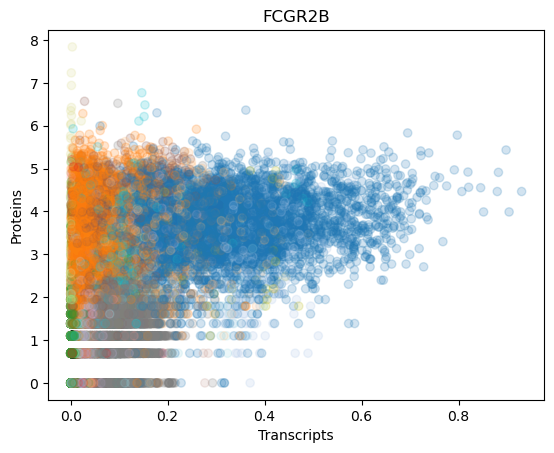

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.090543      3.047929
std        0.116904      0.648900
min        0.000000      0.000000
25%        0.004809      2.639057
50%        0.045112      2.995732
75%        0.146974      3.401197
max        1.480765      9.943957

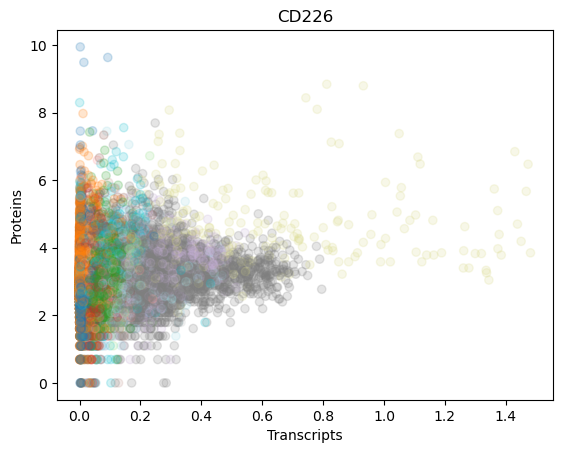

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.002636      0.768597
std        0.018853      0.603470
min        0.000000      0.000000
25%        0.000028      0.000000
50%        0.000278      0.693147
75%        0.001448      1.098612
max        0.726101      6.769642

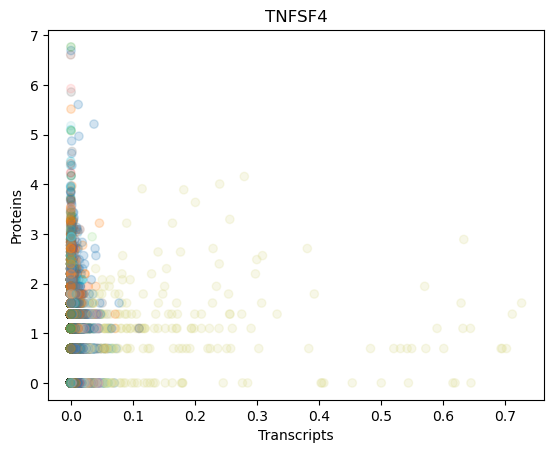

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.145169      2.153239
std        0.274413      0.613325
min        0.000000      0.000000
25%        0.007277      1.791759
50%        0.021929      2.197225
75%        0.153492      2.484907
max        1.909127      8.960596

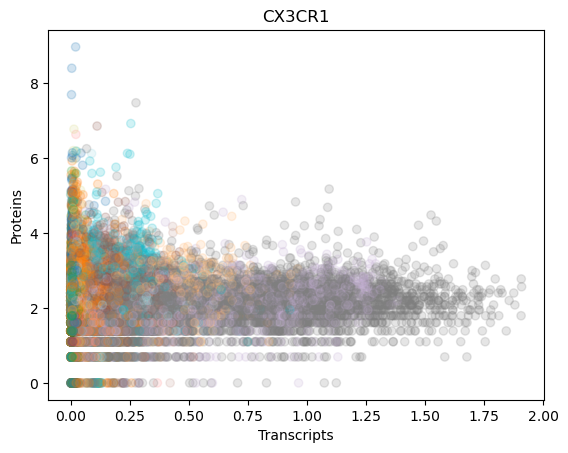

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.366087      1.781050
std        0.383715      1.193807
min        0.000482      0.000000
25%        0.018569      0.693147
50%        0.285741      1.791759
75%        0.630960      2.833213
max        1.657229      5.755742

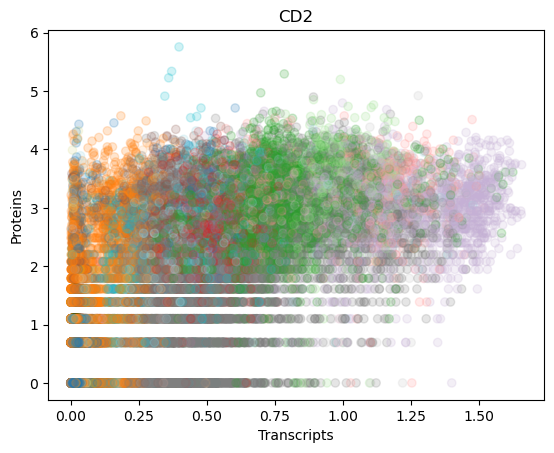

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.076881      1.438421
std        0.067622      0.629106
min        0.000000      0.000000
25%        0.014108      1.098612
50%        0.067699      1.386294
75%        0.117584      1.791759
max        0.548996      7.800982

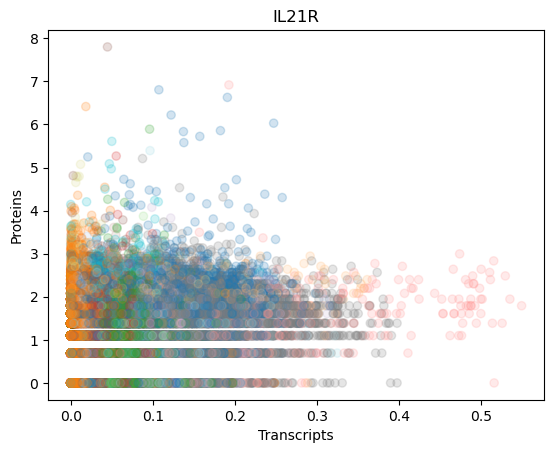

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.089735      0.944990
std        0.171911      0.830469
min        0.000000      0.000000
25%        0.003531      0.000000
50%        0.008834      0.693147
75%        0.029467      1.386294
max        0.834398      6.086775

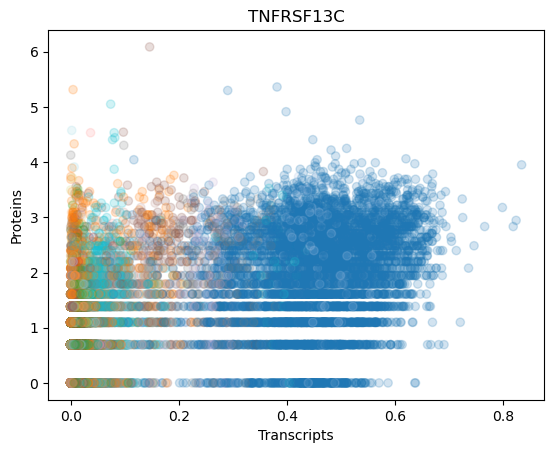

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.063090      1.021993
std        0.114544      0.840029
min        0.000000      0.000000
25%        0.001572      0.693147
50%        0.007391      0.693147
75%        0.064250      1.609438
max        0.929467      6.135565

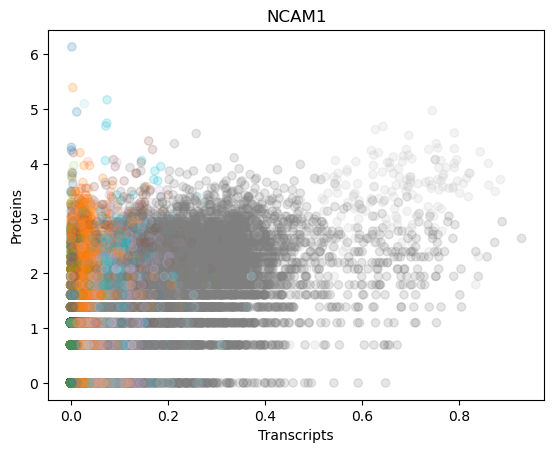

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.461873      0.991044
std        0.712971      0.892464
min        0.000158      0.000000
25%        0.033452      0.000000
50%        0.050463      0.693147
75%        0.806512      1.386294
max        2.697455      9.018575

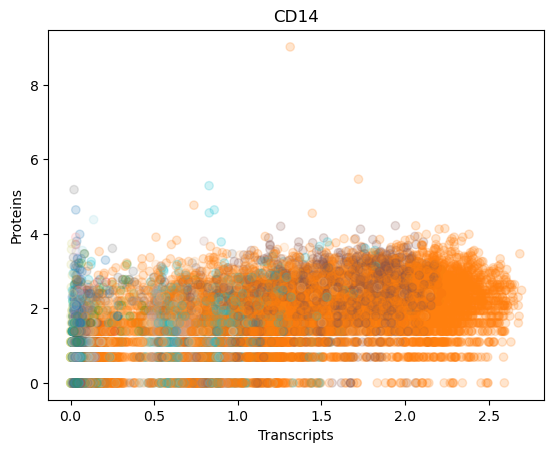

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.000114      2.258013
std        0.001014      0.580789
min        0.000000      0.000000
25%        0.000000      1.945910
50%        0.000000      2.302585
75%        0.000000      2.564949
max        0.049780      9.112948

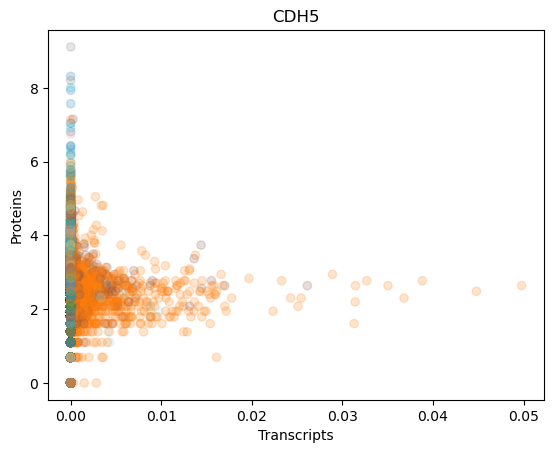

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.202772      1.557117
std        0.298822      0.882755
min        0.000091      0.000000
25%        0.015899      1.098612
50%        0.068309      1.386294
75%        0.237839      1.945910
max        1.594154      8.393895

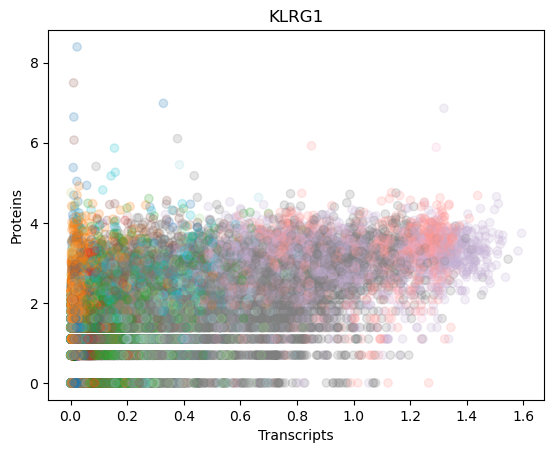

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.088047      1.299002
std        0.125793      0.680141
min        0.000000      0.000000
25%        0.005591      0.693147
50%        0.024287      1.386294
75%        0.118665      1.791759
max        0.702855      8.139149

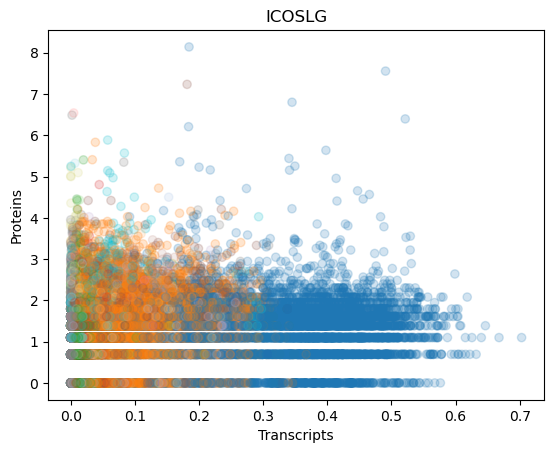

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.527678      1.094933
std        0.800558      0.963140
min        0.001012      0.000000
25%        0.028603      0.693147
50%        0.049657      1.098612
75%        0.823947      1.609438
max        2.567185      6.052089

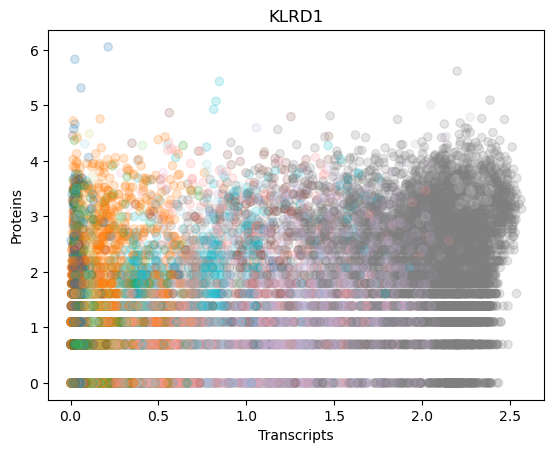

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.251513      0.838129
std        0.145581      0.628233
min        0.000000      0.000000
25%        0.153556      0.693147
50%        0.229752      0.693147
75%        0.368230      1.098612
max        0.832325      9.661925

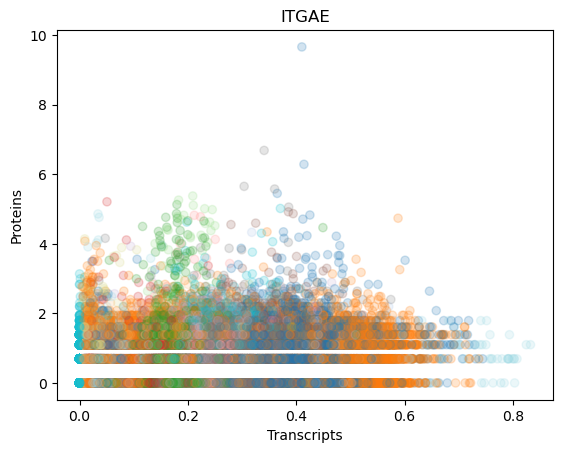

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.163176      0.882381
std        0.276936      1.094597
min        0.000261      0.000000
25%        0.008927      0.000000
50%        0.018008      0.693147
75%        0.215454      1.386294
max        1.355746      6.767343

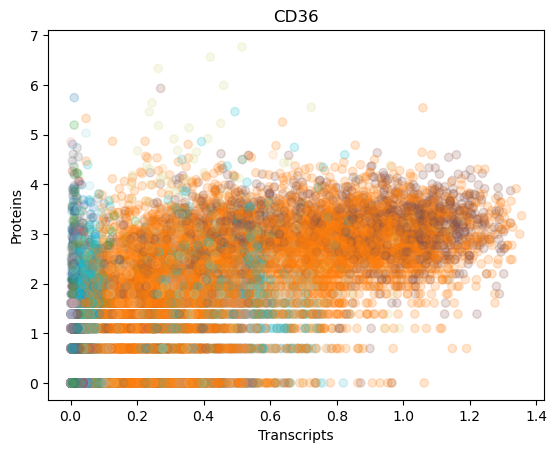

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.041121      1.519283
std        0.077417      0.709858
min        0.000000      0.000000
25%        0.001606      1.098612
50%        0.004876      1.609438
75%        0.041789      1.945910
max        0.601822      9.364691

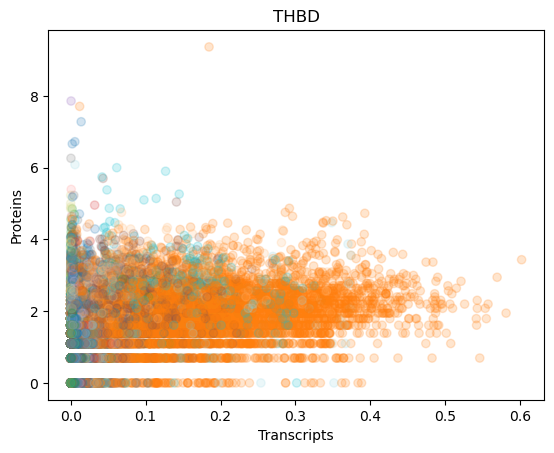

Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.141029      1.920529
std        0.236479      1.554436
min        0.000000      0.000000
25%        0.007264      0.693147
50%        0.015512      1.386294
75%        0.203101      3.496508
max        1.316740      6.987490

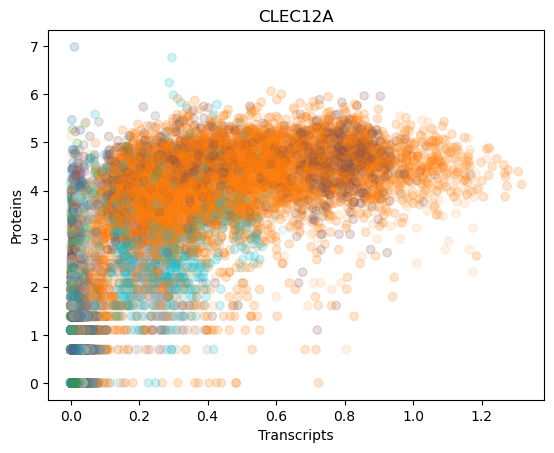

In [16]:

for prot in prots[0:20]:
    try:
        df = create_transcript_protein_df(adata, prot)
        df=pd.concat([df, adata_rna.obs["cell_type"]], axis=1)

        display(df.describe())

        plt.scatter(df["Transcripts"], df["Proteins"], alpha=0.2, c=df['cell_type'].cat.codes, cmap='tab20')
        plt.xlabel("Transcripts")
        plt.ylabel("Proteins")
        plt.title(prot)
        plt.show()
    except Exception as e:
        raise (e)


Transcripts      Proteins
count  39625.000000  39625.000000
mean       0.131341      0.800812
std        0.263536      0.815274
min        0.000000      0.000000
25%        0.002703      0.000000
50%        0.006461      0.693147
75%        0.027575      1.098612
max        1.450652      5.030438

0.05
0.5
0.95


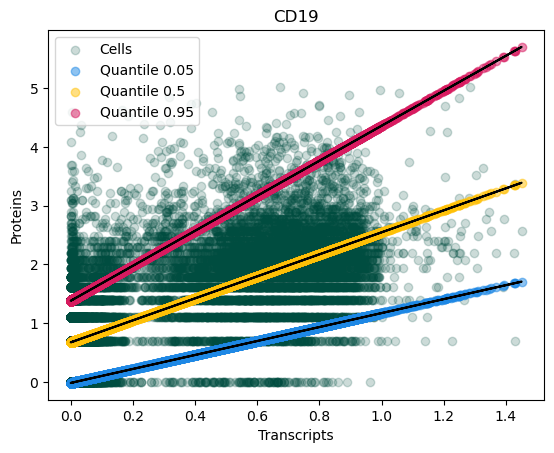

In [17]:
# Python program to visualize quantile regression

# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

np.random.seed(0)

prot="CD19"

try:
    df = create_transcript_protein_df(adata, prot)
    df=pd.concat([df, adata_rna.obs["cell_type"]], axis=1)
    display(df.describe())
except Exception as e:
    raise (e)

# Number of rows
quantiles=[0.05, 0.5, 0.95]
plt.scatter(df["Transcripts"], df["Proteins"], alpha=0.2, color='#004D40', label="Cells")

plt.xlabel("Transcripts")
plt.ylabel("Proteins")
plt.title(prot)
q_colors=['#1E88E5', '#FFC107', '#D81B60']
for i, q in enumerate(quantiles):
    print(q)
    model = smf.quantreg('Proteins ~ Transcripts', 
                    df).fit(q=q)
    y_line = lambda a, b: a + df["Transcripts"]*b
    y = y_line(model.params['Intercept'],
        model.params['Transcripts'])
    plt.plot(df["Transcripts"], y, color='black')
    plt.scatter(df["Transcripts"], y, alpha=.5, color=q_colors[i], label="Quantile "+str(q))

# Save the plot
plt.legend()
plt.savefig('quantile_regression.png')


## Save the data

In [18]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

np.random.seed(0)

# Initialize lists to store results
entries_count_list = []
all_slopes = []
all_intercepts = []

# Iterate over the protein list
for prot in prots:
    try:
        # Create DataFrame for the current protein
        df = create_transcript_protein_df(adata, prot)
        
        # Filter non-zero transcript entries and append the count
        non_zero_entries = len(df[df["Transcripts"] != 0])
        entries_count_list.append(non_zero_entries)

        # Add cell type information to the DataFrame
        df = df.join(adata_rna.obs["cell_type"])

        # Define quantiles and initialize lists to store slopes and intercepts
        quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
        quantile_slopes = []
        quantile_intercepts = []

        # Perform quantile regression for each quantile
        for q in quantiles:
            model = smf.quantreg('Proteins ~ Transcripts', df).fit(q=q)
            quantile_slopes.append(model.params["Transcripts"])
            quantile_intercepts.append(model.params["Intercept"])

        # Append results to the lists
        all_slopes.append(quantile_slopes)
        all_intercepts.append(quantile_intercepts)

    except Exception as e:
        print(e)
        # Append NaN if an error occurs
        all_slopes.append([np.nan] * len(quantiles))
        all_intercepts.append([np.nan] * len(quantiles))

# Create DataFrames for results
qRegResults_slopes = pd.DataFrame(all_slopes, columns=[f"{q}_slope" for q in quantiles])
qRegResults_intercepts = pd.DataFrame(all_intercepts, columns=[f"{q}_intercept" for q in quantiles])

# Combine results into a single DataFrame
qRegResults = pd.concat([qRegResults_slopes, qRegResults_intercepts], axis=1)
qRegResults.index = prots

# Save results to Excel
qRegResults.to_excel("qRegResults.xlsx")

# Display the results
print(qRegResults)


/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/opt/conda/lib/

            0.05_slope  0.25_slope  0.5_slope  0.75_slope  0.95_slope  \
VCAM1    -1.090694e-08   -0.000001  -0.000007   -0.000007   -0.000013   
NCR1      8.790280e-06    1.108826   1.329664    1.754866    2.257545   
IL4R      6.078876e-06    0.100687   0.000005    0.106856    0.000002   
FCGR2B    5.189201e+00    5.785308   6.514362    4.572873    1.995581   
CD226     1.258796e+00    1.406138   1.439058    1.291124    1.003051   
...                ...         ...        ...         ...         ...   
ITGA6     1.952569e+00    2.028043   1.814046    1.470083    0.885436   
CD83      7.639702e-08    0.000003   0.000006    0.105276    0.119356   
TNFRSF25 -1.102059e-06   -0.000003  -0.458776   -0.604541   -0.754726   
CR2       4.400962e+00   18.894053  28.863601   30.948891   42.098112   
KLRB1     3.710012e-07    0.000006   0.342012    0.360247    0.325099   

          0.05_intercept  0.25_intercept  0.5_intercept  0.75_intercept  \
VCAM1       6.931472e-01        1.098613   1.386

## Inter-cluster RTP differences per gene

### Scatter plot

These are useful because it compares clusters, which are assumed to be similar, rather than cells, among which small transcript differences might be mistakenly detected. If most cell types lie on the same line, that specific protein can be reliably detected using number of transcripts as well as the slope.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

min_cell_count=1


def mean_df(data, threshold=0.15):
    means = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            means[col] = np.mean(data[col])
        else:
            means[col] = np.nan
    return pd.Series(means)

def median_df(data, threshold=0.15):
    means = {}
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            means[col] = np.median(data[col])
        else:
            means[col] = np.nan
    return pd.Series(means)


# Uses gene counts per 10,000 cells for score calculation

batch_labels = ['-b1', '-b2', '-b3']

averagedMatrix_rna=pd.DataFrame()
averagedMatrix_prot=pd.DataFrame()

rna_medians=[]
prot_medians=[]
rna_means=[]
prot_means=[]
cellTypeList=[]
protList=[]

for batch in batch_labels:
    cellMatrix_rna = adata_rna.to_df()
    cellMatrix_prot = adata_prot.to_df()

    cellMatrix_rna['cell_type']= adata_rna.obs['cell_type']
    cellMatrix_prot['cell_type']= adata_prot.obs['cell_type']

    cellTypes = list(cellMatrix_rna['cell_type'].unique())

    sums=[]
    for cell_t in cellTypes:
        cellTypeList.append(cell_t+batch)
        temp_df_rna= cellMatrix_rna.loc[cellMatrix_rna['cell_type']==cell_t]
        temp_df_prot= cellMatrix_prot.loc[cellMatrix_prot['cell_type']==cell_t]
        rna_medians.append(median_df(temp_df_rna))
        prot_medians.append(median_df(temp_df_prot))
        rna_means.append(mean_df(temp_df_rna))
        prot_means.append(mean_df(temp_df_prot))

averagedMatrix_rna=pd.DataFrame(rna_medians, index=cellTypeList)
averagedMatrix_prot=pd.DataFrame(prot_medians, index=cellTypeList)

averagedMatrix_rna_means=pd.DataFrame(rna_means, index=cellTypeList)
averagedMatrix_prot_means=pd.DataFrame(prot_means, index=cellTypeList)

In [ ]:
display(averagedMatrix_rna)
display(averagedMatrix_prot)
display(averagedMatrix_rna_means)
display(averagedMatrix_prot_means)

### Plot points

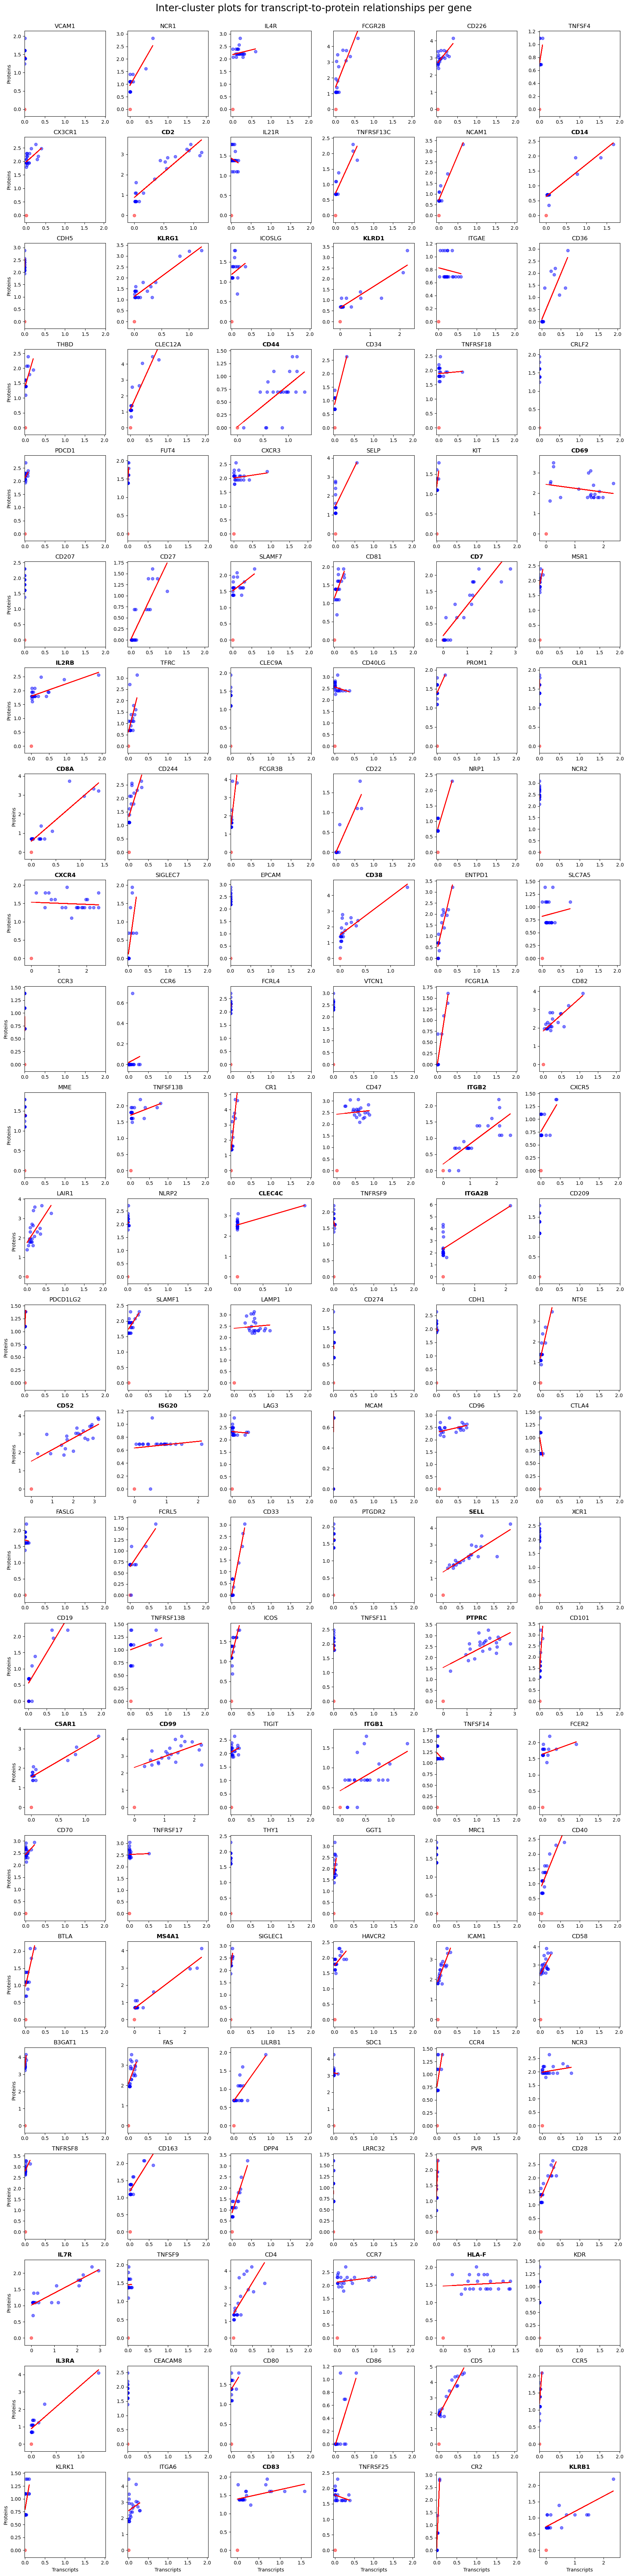

In [20]:
x_ind, y_ind=orgMyPlots(len(prots),6)
fig, ax = plt.subplots(nrows=np.max(y_ind)+1, ncols=np.max(x_ind)+1, figsize=(18, 15*np.array(x_ind).max()))
r_vals=[]
p_vals=[]
slopes=[]
intercepts=[]
max_transcripts=[]

for j, prot in enumerate(prots):
    #try:
    points=pd.DataFrame({"x": averagedMatrix_rna[prot].values, "y":averagedMatrix_prot[prot].values})
    points.dropna(inplace=True,how='any',axis=0)
    zeros=pd.DataFrame([{'x':0, 'y':0}])
    points=pd.concat([points,zeros], axis=0)
    points.reset_index(inplace=True, drop=True)
    try:
        res=stats.linregress(points['x'], points['y'])
        slopes.append(res.slope)
        intercepts.append(res.intercept)
        r_vals.append(res.rvalue)
        p_vals.append(res.pvalue)
        
    except:
        slopes.append(np.nan)
        intercepts.append(np.nan)
        r_vals.append(np.nan)
        p_vals.append(np.nan)
    if(y_ind[j]==np.max(y_ind)):
        ax[y_ind[j],x_ind[j]].set_xlabel("Transcripts")
    if(x_ind[j]==0):
        ax[y_ind[j],x_ind[j]].set_ylabel("Proteins")
        
        
    if(points['x'].max()>np.log1p(2)):
        ax[y_ind[j],x_ind[j]].set_title(prot, fontweight='bold')
        max_x=points['x'].max()
    else:
        ax[y_ind[j],x_ind[j]].set_title(prot)
        max_x=2
        
    try:
        paddingx=points['x'].max()/10
        paddingy=points['y'].max()/10
        ax[y_ind[j],x_ind[j]].set_xlim(0-paddingx,max_x+paddingx)
        ax[y_ind[j],x_ind[j]].set_ylim(0-paddingy,averagedMatrix_prot[prot].max()+paddingy)
    except:
        pass
    
    ax[y_ind[j],x_ind[j]].scatter(0, 0, alpha=0.5, c='r')
    for i, txt in enumerate(cellTypes):
        ax[y_ind[j],x_ind[j]].scatter(averagedMatrix_rna[prot].values[i], averagedMatrix_prot[prot].values[i], alpha=0.5, color='b')
    ax[y_ind[j],x_ind[j]].plot(points['x'].values,res.intercept+res.slope*points['x'], c='r')
            #ax[y_ind[i],x_ind[i]].annotate(txt, (averagedMatrix_rna[prot].values[i], averagedMatrix_prot[prot].values[i]))
    #except:
        #continue
    max_transcripts.append(points['x'].max())
        
#fig.colorbar()
fig.suptitle("Inter-cluster plots for transcript-to-protein relationships per gene", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
fig.savefig("Inter-cluster.png")

regressResults=pd.DataFrame({"Gene": prots, "Slope": slopes, "Intercept": intercepts, "R-Value": r_vals, "P-Value": p_vals, "Max_Transcripts": max_transcripts})
regressResults.to_excel("Regression_Results.xlsx")

In [21]:
display(regressResults)

Gene      Slope  Intercept   R-Value       P-Value  Max_Transcripts
0       VCAM1  -0.100667   1.444274 -0.001013  9.935085e-01         0.010667
1        NCR1   2.633771   0.945603  0.833778  2.000391e-18         0.604285
2        IL4R   0.374027   2.178666  0.140281  2.575303e-01         0.595823
3      FCGR2B   6.165825   1.414897  0.787602  2.659653e-15         0.584827
4       CD226   2.860640   2.722051  0.581801  2.424044e-07         0.390985
..        ...        ...        ...       ...           ...              ...
139     ITGA6   1.701180   2.469859  0.210761  8.690084e-02         0.284984
140      CD83   0.258120   1.396450  0.412811  5.173136e-04         1.575857
141  TNFRSF25  -0.444154   1.785576 -0.186719  1.302949e-01         0.379673
142       CR2  36.933289   0.049916  0.938578  9.641570e-32         0.075625
143     KLRB1   0.473235   0.722941  0.781610  5.932603e-15         2.332339

[144 rows x 6 columns]

In [22]:
points=[]
for j, prot in enumerate(prots):
    prot_points=pd.DataFrame({"Gene": prot, "x_median": averagedMatrix_rna[prot].clip(lower=0), "x_mean": averagedMatrix_rna_means[prot].clip(lower=0), "y_median":averagedMatrix_prot[prot].clip(lower=0), "y_mean":averagedMatrix_prot_means[prot].clip(lower=0)})
    prot_points.dropna(inplace=True,how='any',axis=0)
    points.append(prot_points)

points=pd.concat(points)
display(points)

Gene  x_median    x_mean  y_median    y_mean
CD16_mono-b1          VCAM1  0.000000  0.000033  1.609438  1.599798
B_naive-b1            VCAM1  0.000000  0.000113  1.386294  1.443199
CD14_mono-b1          VCAM1  0.000000  0.000153  1.609438  1.524538
RBC-b1                VCAM1  0.000000  0.000639  1.609438  1.630810
NK_16hi-b1            VCAM1  0.000969  0.004042  1.386294  1.385802
...                     ...       ...       ...       ...       ...
DC3-b3                KLRB1  0.453363  0.447698  1.386294  1.239241
B_switched_memory-b3  KLRB1  0.013457  0.015153  0.693147  0.844506
B_exhausted-b3        KLRB1  0.030659  0.031389  0.693147  0.783240
pDC-b3                KLRB1  0.035476  0.038669  0.693147  0.695623
HSC_CD38pos-b3        KLRB1  0.067226  0.097074  0.693147  0.584835

[9504 rows x 5 columns]

## Save all 3 batches inter-cluster points

In [23]:
points.to_excel("Inter-cluster_points.xlsx")